<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- [X] The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- [ ] Normalize the data (all features should have roughly the same scale)
- [X] Import the type of model and layers that you will need from Keras.
- [X] Instantiate a model object and use `model.add()` to add layers to your model
- [X] Since this is a regression model you will have a single output node in the final layer.
- [X] Use activation functions that are appropriate for this task
- [X] Compile your model
- [X] Fit your model and report its accuracy in terms of Mean Squared Error
- [X] Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- [ ] Run this same data through a linear regression model. Which achieves higher accuracy?
- [ ] Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- [ ] After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
##### Your Code Here #####
from tensorflow.keras.datasets import boston_housing, fashion_mnist
import pandas as pd

(b_X_train, b_y_train), (b_X_test, b_y_test) = boston_housing.load_data()

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

stop = EarlyStopping(monitor='val_mean_absolute_error', min_delta=0.5, patience=3)

model = Sequential([
    Flatten(),
    Dense(13, input_dim=13, activation='relu'),
    Dense(13, activation='relu'),
    Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

b_history = model.fit(b_X_train, b_y_train, epochs=50, 
                    validation_data=(b_X_test, b_y_test),
                    callbacks=[stop])

Train on 404 samples, validate on 102 samples
Epoch 1/50
404/404 [==============================] - 0s 673us/sample - loss: 1712.6134 - mean_absolute_error: 35.6699 - val_loss: 933.2460 - val_mean_absolute_error: 27.5618
Epoch 2/50
404/404 [==============================] - 0s 47us/sample - loss: 584.6595 - mean_absolute_error: 20.2091 - val_loss: 265.3051 - val_mean_absolute_error: 13.4076
Epoch 3/50
404/404 [==============================] - 0s 49us/sample - loss: 167.6003 - mean_absolute_error: 9.7629 - val_loss: 104.8270 - val_mean_absolute_error: 7.8101
Epoch 4/50
404/404 [==============================] - 0s 52us/sample - loss: 111.0762 - mean_absolute_error: 7.7293 - val_loss: 106.6465 - val_mean_absolute_error: 8.0604
Epoch 5/50
404/404 [==============================] - 0s 52us/sample - loss: 112.1405 - mean_absolute_error: 7.6997 - val_loss: 97.4811 - val_mean_absolute_error: 7.7081
Epoch 6/50
404/404 [==============================] - 0s 49us/sample - loss: 109.9434 - mean_a

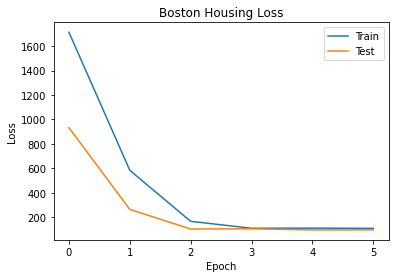

In [3]:
import matplotlib.pyplot as plt

plt.plot(b_history.history['loss'])
plt.plot(b_history.history['val_loss'])
plt.title('Boston Housing Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- [X] Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- [X] Make sure to one-hot encode your category labels
- [X] The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- [X] Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- [X] Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [4]:
##### Your Code Here #####
import numpy as np
import keras

(fmnist_X_train, fmnist_y_train), (fmnist_X_test, fmnist_y_test) = fashion_mnist.load_data()

fmnist_X_train = fmnist_X_train.astype('float32') / 255.0
fmnist_X_test = fmnist_X_test.astype('float32') / 255.0

fmnist_y_train = keras.utils.to_categorical(fmnist_y_train, 10)
fmnist_y_test = keras.utils.to_categorical(fmnist_y_test, 10)

Using TensorFlow backend.


In [11]:
stop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3)

model = Sequential([
    Flatten(),
    Dense(784, input_dim=784, activation='relu'),
    Dropout(0.2),
    Dense(392, activation='relu'),
    Dropout(0.2),
    Dense(196, activation='relu'),
    Dropout(0.2),
    Dense(98, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

fmnist_history = model.fit(fmnist_X_train, fmnist_y_train, epochs=50,
                    validation_data=(fmnist_X_test, fmnist_y_test),
                    callbacks=[stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 27s 458us/sample - loss: 0.5657 - accuracy: 0.7969 - val_loss: 0.4311 - val_accuracy: 0.8434
Epoch 2/50
60000/60000 [==============================] - 27s 449us/sample - loss: 0.4219 - accuracy: 0.8483 - val_loss: 0.4312 - val_accuracy: 0.8489
Epoch 3/50
60000/60000 [==============================] - 27s 448us/sample - loss: 0.3850 - accuracy: 0.8621 - val_loss: 0.4029 - val_accuracy: 0.8572
Epoch 4/50
60000/60000 [==============================] - 27s 452us/sample - loss: 0.3676 - accuracy: 0.8680 - val_loss: 0.3675 - val_accuracy: 0.8714
Epoch 5/50
60000/60000 [==============================] - 27s 448us/sample - loss: 0.3534 - accuracy: 0.8737 - val_loss: 0.3611 - val_accuracy: 0.8725
Epoch 6/50
60000/60000 [==============================] - 30s 495us/sample - loss: 0.3387 - accuracy: 0.8786 - val_loss: 0.3628 - val_accuracy: 0.8680
Epoch 7/50
60000/60000 [====================

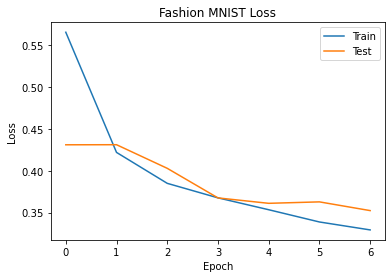

In [12]:
plt.plot(fmnist_history.history['loss'])
plt.plot(fmnist_history.history['val_loss'])
plt.title('Fashion MNIST Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.